<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/ML_5_Vivek_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q1 K-Means
Implement K-Means Clustering on the dataset at the following location :  https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

You are expected to do all necessary EDA, feature scaling and transforms.

First, arbitarily choose cluster value as 2. Then use the elbow method which was discussed in class to identify the best number of cluster. While exploring this, if you observe the need to consider inertia as a factor, do so with proper rationale.

Write a bried explanation as to how PCA can help with clustering in this example.

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [20]:
#url='https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand'
df = pd.read_csv('/content/Live_20210128.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [21]:
df1=df.drop(['status_id','Column1',	'Column2',	'Column3',	'Column4'], axis=1)
df1

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [22]:
df1.shape

(7050, 11)

In [23]:
df1.columns

Index(['status_type', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'],
      dtype='object')

In [24]:
df1.isnull().count()

status_type         7050
status_published    7050
num_reactions       7050
num_comments        7050
num_shares          7050
num_likes           7050
num_loves           7050
num_wows            7050
num_hahas           7050
num_sads            7050
num_angrys          7050
dtype: int64

In [25]:
import pandas as pd
from sklearn.cluster import KMeans

# Extract the features that you want to use for clustering
X = df1[['num_reactions','num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys']]

# Initialize the KMeans model and specify the number of clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(X)

# Predict the clusters for each data point
predictions = kmeans.predict(X)

# Add the predictions as a new column to the original dataframe
df1['cluster'] = predictions

# View the resulting clusters
print(df1)


     status_type status_published  num_reactions  num_comments  num_shares  \
0          video   4/22/2018 6:00            529           512         262   
1          photo  4/21/2018 22:45            150             0           0   
2          video   4/21/2018 6:17            227           236          57   
3          photo   4/21/2018 2:29            111             0           0   
4          photo   4/18/2018 3:22            213             0           0   
...          ...              ...            ...           ...         ...   
7045       photo   9/24/2016 2:58             89             0           0   
7046       photo  9/23/2016 11:19             16             0           0   
7047       photo  9/21/2016 23:03              2             0           0   
7048       photo   9/20/2016 0:43            351            12          22   
7049       photo  9/10/2016 10:30             17             0           0   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_

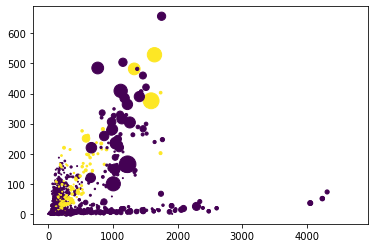

In [28]:
plt.scatter(X['num_likes'], X['num_loves'],X['num_wows'],c=predictions, cmap='viridis')

# Show the plot
plt.show()

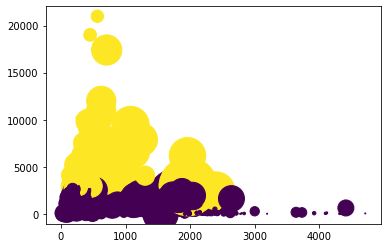

In [29]:
plt.scatter(X['num_reactions'], X['num_comments'],X['num_shares'],c=predictions, cmap='viridis')

# Show the plot
plt.show()

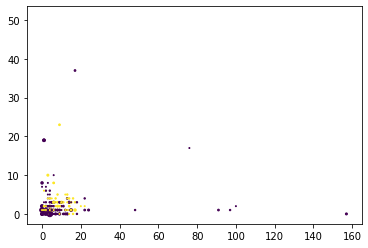

In [30]:
plt.scatter(X['num_hahas'], X['num_sads'],X['num_angrys'],c=predictions, cmap='viridis')

# Show the plot
plt.show()

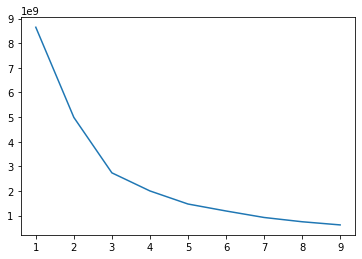

In [31]:

# Create an empty list and store SSE for values of k
sse = []

# Iterate over a range of k values
for k in range(1, 10):
    # Initialize the KMeans model and fit it to the data
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    # Calculate the SSE and append it to the list
    sse.append(kmeans.inertia_)

# Plot the SSE values
plt.plot(range(1, 10), sse)

# Show the plot
plt.show()


In [32]:
# Initialize the KMeans model and specify the number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Predict the clusters for each data point
predictions = kmeans.predict(X)

# Add the predictions as a new column to the original dataframe
df1['cluster'] = predictions

print(df1)

     status_type status_published  num_reactions  num_comments  num_shares  \
0          video   4/22/2018 6:00            529           512         262   
1          photo  4/21/2018 22:45            150             0           0   
2          video   4/21/2018 6:17            227           236          57   
3          photo   4/21/2018 2:29            111             0           0   
4          photo   4/18/2018 3:22            213             0           0   
...          ...              ...            ...           ...         ...   
7045       photo   9/24/2016 2:58             89             0           0   
7046       photo  9/23/2016 11:19             16             0           0   
7047       photo  9/21/2016 23:03              2             0           0   
7048       photo   9/20/2016 0:43            351            12          22   
7049       photo  9/10/2016 10:30             17             0           0   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_

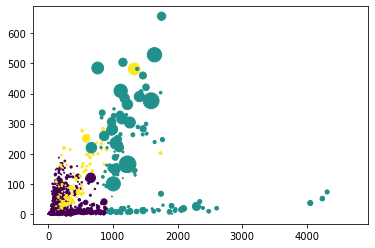

In [33]:
plt.scatter(X['num_likes'], X['num_loves'],X['num_wows'],c=predictions, cmap='viridis')

# Show the plot
plt.show()

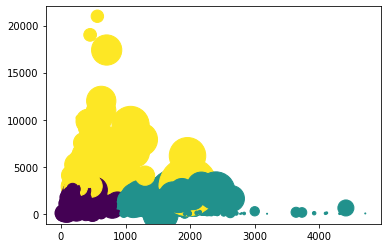

In [34]:
plt.scatter(X['num_reactions'], X['num_comments'],X['num_shares'],c=predictions, cmap='viridis')

# Show the plot
plt.show()

## Q2 Loss Functions
Let the desired output to 10 inputs be,

> [0,1,0,0,1,0,0,1,1,1]


and let the corresponding actual output obtained from a machine be 


> [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


Find programmatically or by hand the loss obtained from using:

1.   a symmetric 0 − 1 loss function,

2.   the cross-entropy loss function and

3.   the hinge loss function.

If required assume a threshold of 0.5 to obtain a class from the machine output.  (sklearn by default uses 0.5 as threshold for binary classification) 


loss = |desired - actual|

In [35]:
desired = [0, 1, 0, 0, 1, 0, 0, 1, 1, 1]
actual = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

# Initializing the loss 
loss = 0

# Iterating over the desired and actual outputs
for d, a in zip(desired, actual):
    pair_loss = abs(d - a)
    
    # Add the loss to the total loss
    loss += pair_loss

# Print the total loss
print(loss)


5.0


 Cross Entropy loss = -(desired * log(actual) + (1 - desired) * log(1 - actual))



In [37]:

import math
loss = 0

# Iterate over the desired and actual outputs
for d, a in zip(desired, actual):
    # Calculate the loss for this pair
    pair_loss = -(d * math.log(a) + (1 - d) * math.log(1 - a))
    
    # Add the loss to the total loss
    loss += pair_loss

# Print the total loss
print(loss)

9.162907318741551


Hinge loss = max(0, 1 - desired * actual)

In [40]:
loss = 0

for d, a in zip(desired, actual):
    # Calculate the loss for this pair
    pair_loss = max(0, 1 - d * a)
    
    # Add the loss to the total loss
    loss += pair_loss

# Print the total loss
print(loss)

9.0
